In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import prince as MCA
from prince import MCA
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA

In [85]:
df = pd.read_csv(r'C:\Users\mazlt\Desktop\Repositorio GitHub\data\DogBreeds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   27 non-null     object
 1   SIZE    27 non-null     object
 2   WEIG    27 non-null     object
 3   SPEE    27 non-null     object
 4   INTE    27 non-null     object
 5   AFFE    27 non-null     object
 6   AGGR    27 non-null     object
 7   FUNC    27 non-null     object
dtypes: object(8)
memory usage: 1.8+ KB


In [73]:
##Este código calcula tablas de contingencia para cada una de las variables categóricas en un conjunto de datos
contingency_tables = {}
categorical_variables = ['SIZE', 'WEIG', 'SPEE', 'INTE', 'AFFE', 'AGGR']
for variable in categorical_variables:
    contingency_table = pd.crosstab(index=df[variable], columns='count')
    contingency_tables[variable] = contingency_table

for variable, table in contingency_tables.items():
    print(f'Tabla de contingencia para la variable {variable}:\n{table}\n')

Tabla de contingencia para la variable SIZE:
col_0  count
SIZE        
lar       15
med        5
sma        7

Tabla de contingencia para la variable WEIG:
col_0  count
WEIG        
hea        5
lig        8
med       14

Tabla de contingencia para la variable SPEE:
col_0  count
SPEE        
hig        9
low       10
med        8

Tabla de contingencia para la variable INTE:
col_0  count
INTE        
hig        6
low        8
med       13

Tabla de contingencia para la variable AFFE:
col_0  count
AFFE        
hig       14
low       13

Tabla de contingencia para la variable AGGR:
col_0  count
AGGR        
hig       13
low       14



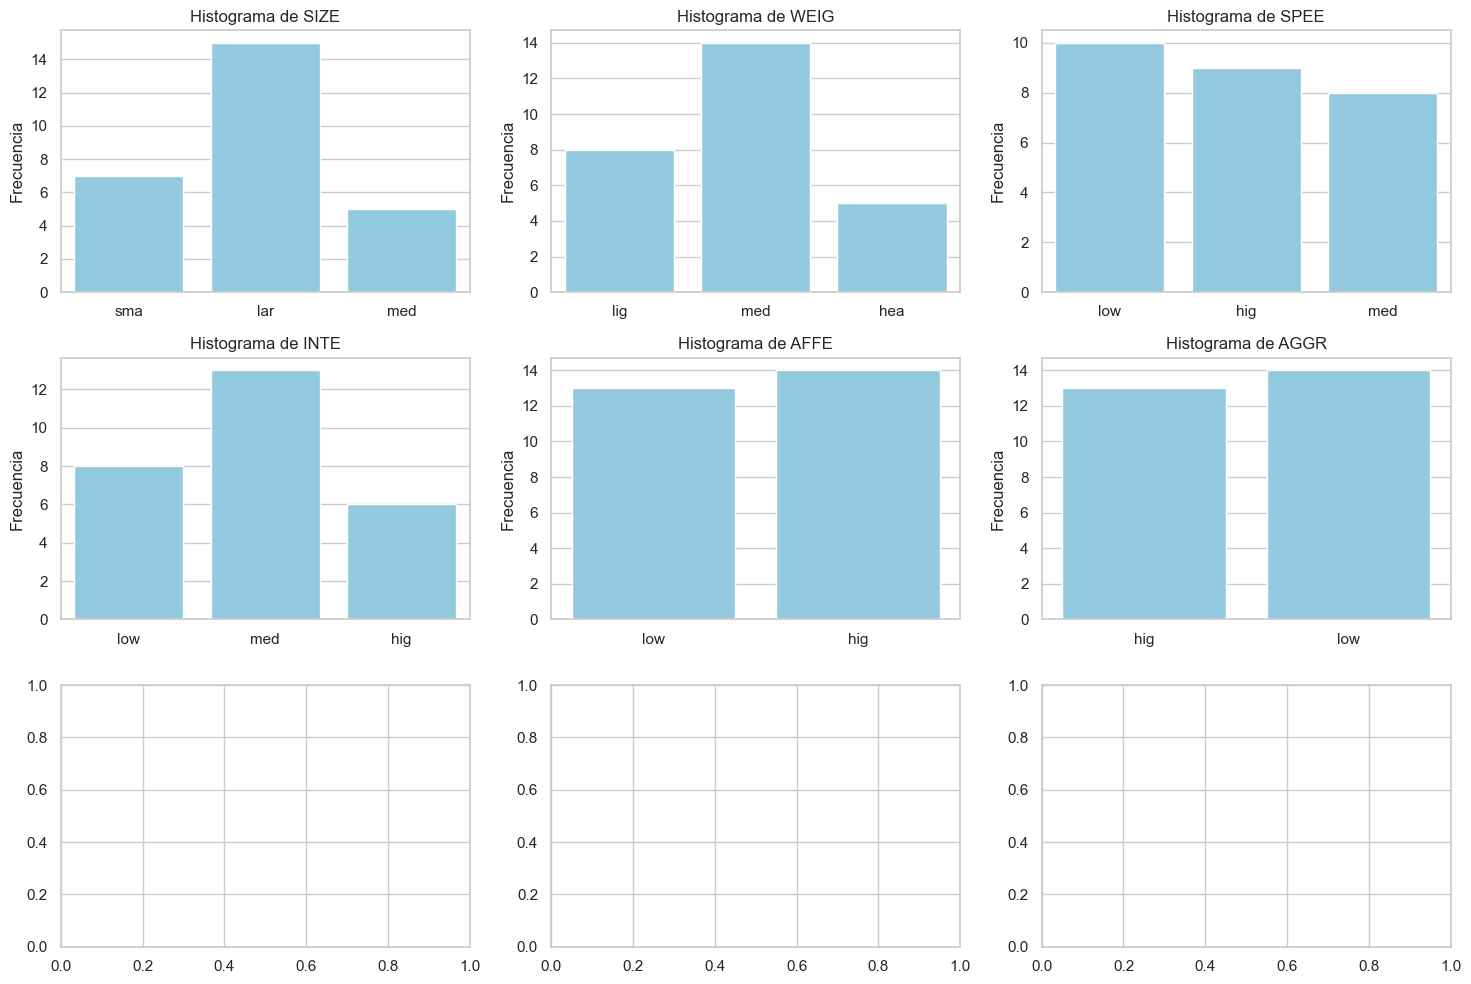

In [74]:
# El código crea un conjunto de subgráficos con histogramas para cada variable 
# categórica en la lista utilizando seaborn para trazar los datos
categorical_variables = ['SIZE', 'WEIG', 'SPEE', 'INTE', 'AFFE', 'AGGR']

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, variable in enumerate(categorical_variables):
    ax = axes[i//3, i%3]
    sns.countplot(data=df, x=variable, ax=ax, color='skyblue')
    ax.set_title(f'Histograma de {variable}')
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

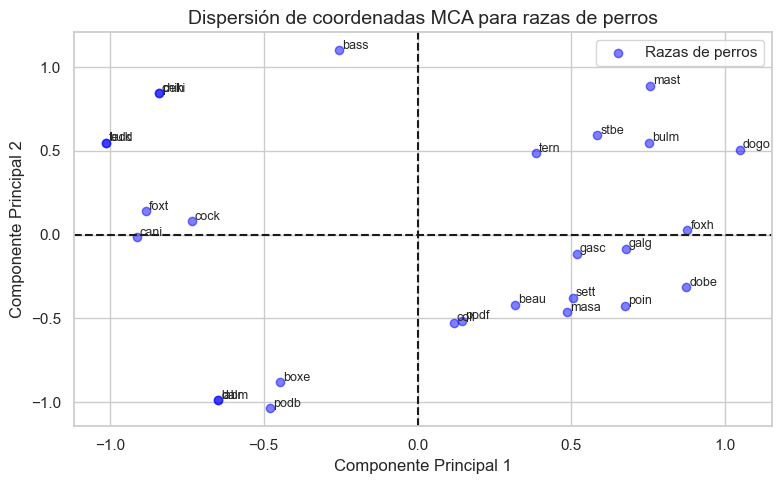

In [75]:
#Gráfico de dispersión MCA para las razas de perros
# este gráfico nos facilita relacionar las razas de perros por sus caracteristicas

categorical_data = df[['SIZE', 'WEIG', 'SPEE', 'INTE', 'AFFE', 'AGGR']]

mca = MCA(n_components=2)

mca.fit(categorical_data)

coordinates = mca.row_coordinates(categorical_data)

plt.figure(figsize=(8, 5))
plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], color='blue', alpha=0.5, label='Razas de perros')

for i, label in enumerate(df['Label']):
    plt.text(coordinates.iloc[i, 0] + 0.01, coordinates.iloc[i, 1] + 0.01, label, fontsize=9)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

plt.title('Dispersión de coordenadas MCA para razas de perros', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

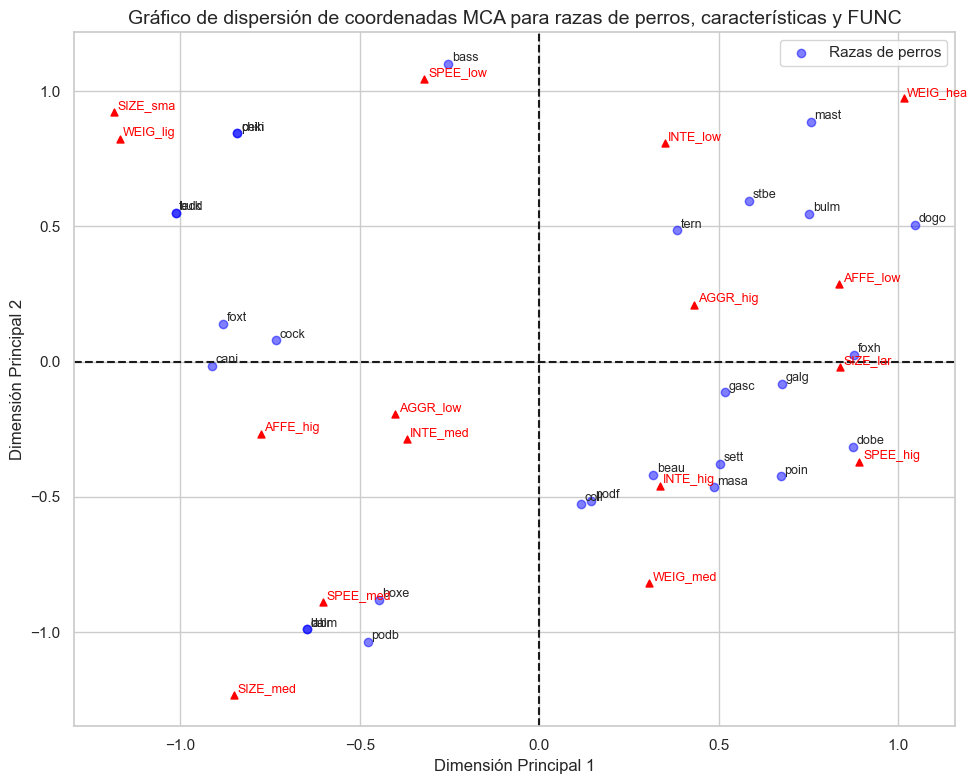

In [78]:
plt.figure(figsize=(10, 8))

plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], color='blue', alpha=0.5, label='Razas de perros')

for i, label in enumerate( df ['Label']):
    plt.text(coordinates.iloc[i, 0] + 0.01, coordinates.iloc[i, 1] + 0.01, label, fontsize=9)

for characteristic in column_coordinates.index:
    if characteristic.strip():
        plt.scatter(column_coordinates.loc[characteristic, 0], column_coordinates.loc[characteristic, 1], color='red', marker='^', s=25)
        plt.text(column_coordinates.loc[characteristic, 0] + 0.01, column_coordinates.loc[characteristic, 1] + 0.01, characteristic, fontsize=9, color='red')

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

plt.title('Gráfico de dispersión de coordenadas MCA para razas de perros, características y FUNC', fontsize=14)
plt.xlabel('Dimensión Principal 1', fontsize=12)
plt.ylabel('Dimensión Principal 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [77]:
import prince

data = pd.read_csv(r'C:\Users\mazlt\Desktop\Repositorio GitHub\data\DogBreeds.csv')
categorical_data = data[['SIZE', 'WEIG', 'SPEE', 'INTE', 'AFFE', 'AGGR']]

mca = prince.MCA(n_components=6, n_iter=3, copy=True, check_input=True, random_state=42)
mca = mca.fit(categorical_data)
row_coordinates = mca.row_coordinates(categorical_data)

column_coordinates = mca.column_coordinates(categorical_data)

In [79]:
characteristic_coordinates = mca.column_coordinates(categorical_data)

characteristic_coordinates

,0,1,2,3,4,5
SIZE_lar,0.836675,-0.020578,-0.051217,0.170222,-0.112663,0.049965
SIZE_med,-0.851088,-1.231720,1.016052,-0.342456,0.310040,-0.118297
SIZE_sma,-1.184956,0.923897,-0.616000,-0.120149,0.019963,-0.022569
WEIG_hea,1.015134,0.973901,1.221595,-0.067605,-0.614518,-0.289232
WEIG_lig,-1.168918,0.824345,-0.358770,-0.164884,0.051221,0.203360
WEIG_med,0.305405,-0.818876,-0.231272,0.118364,0.190201,-0.012908
SPEE_hig,0.892100,-0.371832,-0.763088,0.239848,0.010089,0.532181
SPEE_low,-0.319941,1.044900,0.401729,0.080331,-0.305908,0.024488
SPEE_med,-0.603687,-0.887814,0.356312,-0.370243,0.371036,-0.629313
INTE_hig,0.335066,-0.459483,-0.599924,-1.275249,-1.063191,-0.205389


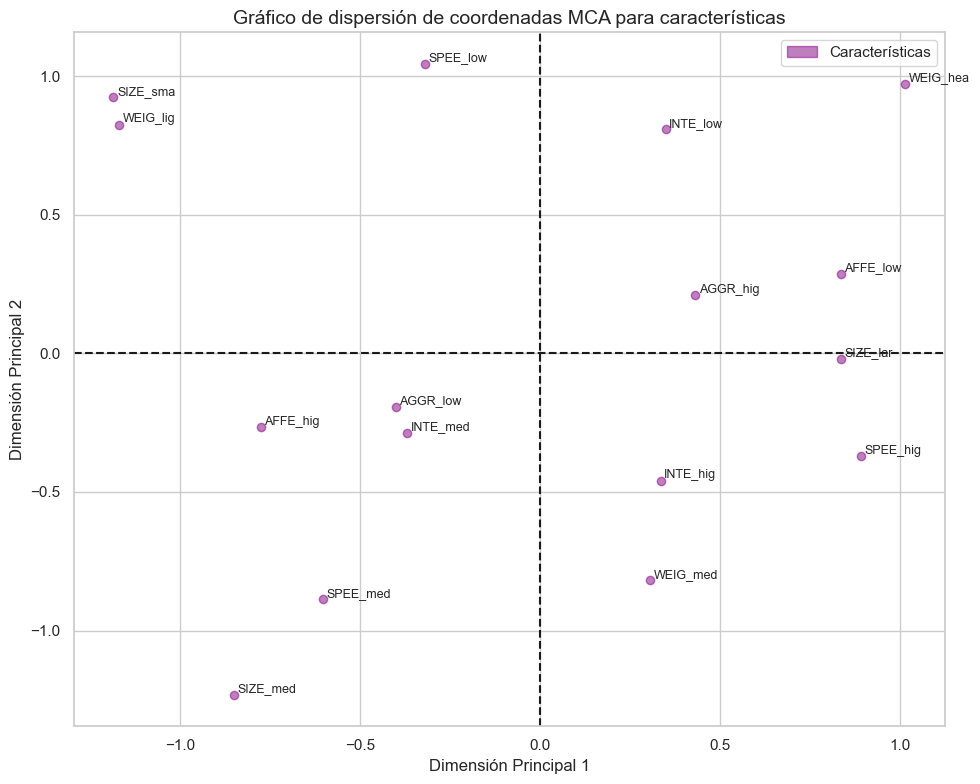

In [80]:
plt.figure(figsize=(10, 8))
plt.scatter(characteristic_coordinates.iloc[:, 0], characteristic_coordinates.iloc[:, 1], color='purple', alpha=0.5)
purple_patch = mpatches.Patch(color='purple', alpha=0.5, label='Características')
plt.legend(handles=[purple_patch])

for i, characteristic in enumerate(characteristic_coordinates.index):
    plt.text(characteristic_coordinates.iloc[i, 0] + 0.01, characteristic_coordinates.iloc[i, 1] + 0.01, characteristic, fontsize=9)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

plt.title('Gráfico de dispersión de coordenadas MCA para características', fontsize=14)
plt.xlabel('Dimensión Principal 1', fontsize=12)
plt.ylabel('Dimensión Principal 2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
mca_func = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
mca_func = mca_func.fit(data.drop(columns=['Label','FUNC']))

column_coordinates_func = mca_func.column_coordinates(data.drop(columns=['Label','SIZE', 'WEIG', 'SPEE', 'INTE', 'AFFE', 'AGGR']))
column_coordinates_func

,0,1
FUNC_com,-1.039341,0.095320
FUNC_hun,0.322391,-0.432432
FUNC_uti,0.936487,0.367336


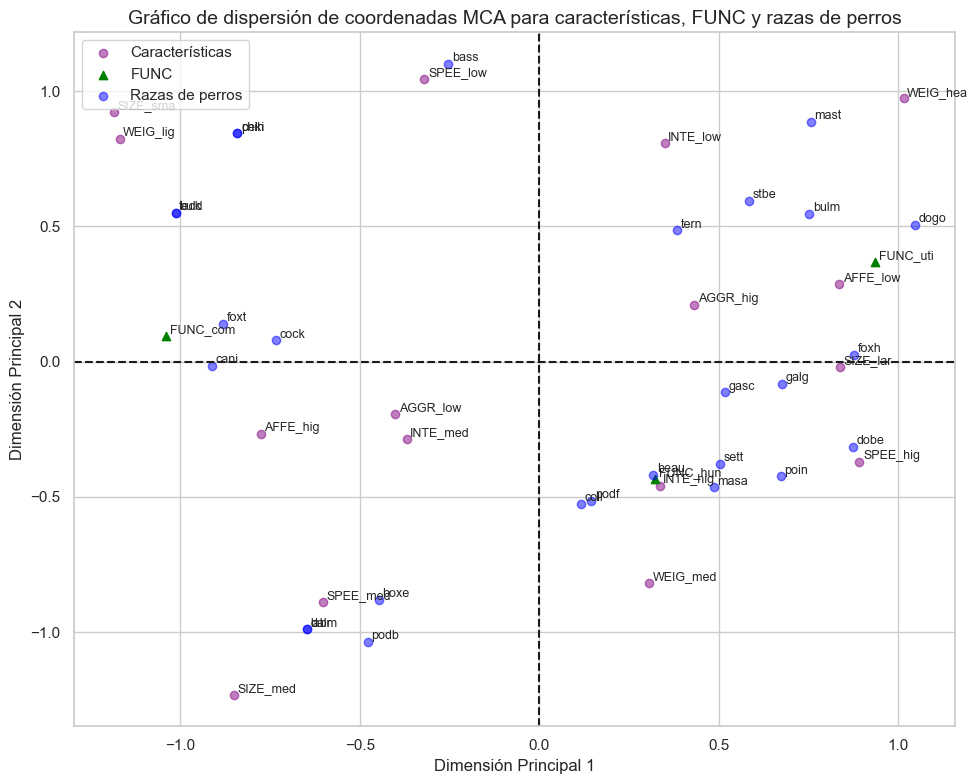

In [84]:
plt.figure(figsize=(10, 8))
plt.scatter(characteristic_coordinates.iloc[:, 0], characteristic_coordinates.iloc[:, 1], color='purple', alpha=0.5, label='Características')

for i, characteristic in enumerate(characteristic_coordinates.index):
    plt.text(characteristic_coordinates.iloc[i, 0] + 0.01, characteristic_coordinates.iloc[i, 1] + 0.01, characteristic, fontsize=9)
plt.scatter(column_coordinates_func.iloc[:, 0], column_coordinates_func.iloc[:, 1], color='green', marker='^', label='FUNC')

for i, category in enumerate(column_coordinates_func.index):
    plt.text(column_coordinates_func.iloc[i, 0] + 0.01, column_coordinates_func.iloc[i, 1] + 0.01, category, fontsize=9)
plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], color='blue', alpha=0.5, label='Razas de perros')

for i, label in enumerate(data['Label']):
    plt.text(coordinates.iloc[i, 0] + 0.01, coordinates.iloc[i, 1] + 0.01, label, fontsize=9)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

plt.title('Gráfico de dispersión de coordenadas MCA para características, FUNC y razas de perros', fontsize=14)
plt.xlabel('Dimensión Principal 1', fontsize=12)
plt.ylabel('Dimensión Principal 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()